In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras import utils, callbacks
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Add, Input, ZeroPadding2D, AveragePooling2D,GlobalAveragePooling2D
from keras.initializers import glorot_uniform
from keras.layers.merge import concatenate
import matplotlib.pyplot as plt
import cv2
from glob import glob
from numpy import floor
import random
from numpy.random import seed
seed(1)

ASL Alphabet for letter: S


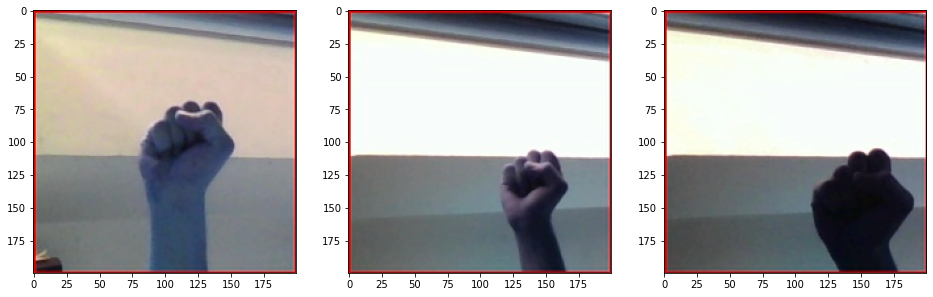

In [2]:
def plot_three_samples(letter):
    print("ASL Alphabet for letter: "+letter)
    base_path = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/'
    img_path = base_path + letter + '/**'
    path_contents = glob(img_path)
    
    plt.figure(figsize=(16,16))
    imgs = random.sample(path_contents,3)
    plt.subplot(1,3,1)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(1,3,2)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(1,3,3)
    plt.imshow(cv2.imread(imgs[2]))
    
    return

plot_three_samples('S')

In [3]:
path = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
path_test = '../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'
target_size = (64,64)
target_dims = (64,64,3)
val_frac = 0.1
n_classes = 29
batch_size = 64

image_generator = ImageDataGenerator(samplewise_center = True, samplewise_std_normalization = True, validation_split=val_frac)

train_gen = image_generator.flow_from_directory(path, target_size=target_size, batch_size=batch_size, shuffle=True, subset='training')
val_gen = image_generator.flow_from_directory(path, target_size=target_size, subset='validation')

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [4]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
RESNET = Sequential()
RESNET.add(tf.keras.applications.ResNet50(
    include_top=False, weights='imagenet',
    input_shape=(64, 64, 3)))
RESNET.add(Flatten())
RESNET.add(Dense(256, activation='relu'))
RESNET.add(Dense(29, activation='softmax'))

RESNET.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'] )
RESNET.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 29)                7453      
Total params: 25,692,573
Trainable params: 25,639,453
Non-trainable params: 53,120
_________________________________________________________________


In [5]:
resnet_model = RESNET.fit(train_gen, epochs=15, validation_data=val_gen)

Epoch 1/15
1224/1224 [==============================] - 503s 404ms/step - loss: 2.5733 - accuracy: 0.3349 - val_loss: 6.3193 - val_accuracy: 0.2985
Epoch 2/15
1224/1224 [==============================] - 151s 123ms/step - loss: 0.6320 - accuracy: 0.7926 - val_loss: 1.0969 - val_accuracy: 0.7441
Epoch 3/15
1224/1224 [==============================] - 152s 124ms/step - loss: 0.4362 - accuracy: 0.8649 - val_loss: 1.5664 - val_accuracy: 0.6533
Epoch 4/15
1224/1224 [==============================] - 153s 125ms/step - loss: 0.3341 - accuracy: 0.8962 - val_loss: 1.1434 - val_accuracy: 0.7587
Epoch 5/15
1224/1224 [==============================] - 153s 125ms/step - loss: 0.5458 - accuracy: 0.8348 - val_loss: 1.1084 - val_accuracy: 0.7405
Epoch 6/15
1224/1224 [==============================] - 155s 127ms/step - loss: 0.5883 - accuracy: 0.8233 - val_loss: 0.9180 - val_accuracy: 0.7623
Epoch 7/15
1224/1224 [==============================] - 155s 126ms/step - loss: 0.2315 - accuracy: 0.9269 - val_